# Regression Lineaire Multiples From Scratch

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

## Creation d'un jeu de données

In [6]:
np.random.seed(0)
x = np.random.randn(200, 5,)
y = x.sum(axis=1).reshape((200, 1)) + np.random.randn(200, 1)
print(x.shape)
print(y.shape)

(200, 5)
(200, 1)


## Implementation from scratch

Definition du modele

In [10]:
def model(X, theta): 
    return X.dot(theta)

Fonction cout

In [13]:
def cost_function(X, theta, y): 
    erreurs = (model(X, theta) - y)**2
    return erreurs.mean(axis=0) / 2

Gradient

In [16]:
def gradient(X, theta, y): 
    gradients = X.T.dot(model(X, theta) - y)
    return gradients / len(y)

Algorithme de gradient descent 

In [19]:
def gradient_descent(X, theta, y, alpha=0.001, nbr_itteration=1000, precision = 0):
    history = []
    for i in range(nbr_itteration):
        theta_precedent = theta
        history.append(cost_function(X, theta, y))
        theta = theta - alpha*gradient(X, theta, y)
        if 0 < precision < 1:
            dist = ((theta - theta_precedent) **2).mean(axis=0)[0]
            if dist <= precision:
                return theta, history
    return theta, history

Entrainememt du modele

In [22]:
X = np.hstack((x, np.ones((x.shape[0], 1))))

In [24]:
theta = np.random.randn(6, 1)

In [26]:
theta, history = gradient_descent(X, theta, y, 0.05, nbr_itteration=500)

In [28]:
theta

array([[0.96102265],
       [0.85542689],
       [0.99965087],
       [0.96659218],
       [1.01299748],
       [0.07991323]])

 Courbe d'apprentissage

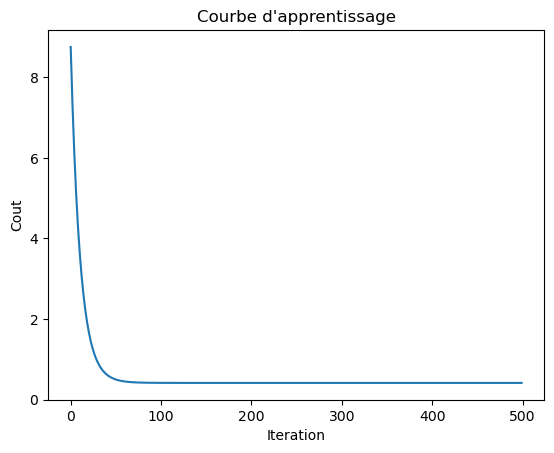

In [31]:
x_m = np.arange(0, 500)
plt.figure()
plt.plot(x_m, history)
plt.xlabel("Iteration")
plt.ylabel("Cout")
plt.title("Courbe d'apprentissage")
plt.show()

Performance du modele

In [34]:
def model_score(X, theta, y): 
    u = ((model(X, theta) - y)**2).sum(axis = 0)
    v = ((y - y.mean(axis=0))**2).sum(axis = 0)
    return (1 - u / v)[0]

In [36]:
print(f"Le score {model_score(X, theta, y) * 100:.2f} %")

Le score 84.85 %


# Regression Lineaire Multiple avec sklearn 

Le jeu de données sur la résistance à la compression du béton, fourni par le Professeur I-Cheng Yeh, est largement utilisé pour modéliser la résistance du béton en fonction de ses composants et de son âge. Ce jeu de données comprend 1 030 observations avec 9 variables quantitatives, dont 8 variables d'entrée représentant les proportions des composants du béton et l'âge du béton en jours, et une variable de sortie représentant la résistance à la compression en mégapascals (MPa). ​

Variables incluses :

Ciment (kg/m³)​

Laitier de haut fourneau (kg/m³)​

Cendre volante (kg/m³)​

Eau (kg/m³)​

Superplastifiant (kg/m³)​

Granulat grossier (kg/m³)​

Granulat fin (kg/m³)​

Âge (jours)​

Résistance à la compression du béton (MPa)​

Ce jeu de données est disponible sur le UCI Machine Learning Repository. ​
archive.ics.uci.edu

Il est couramment utilisé pour des tâches de régression visant à prédire la résistance à la compression du béton en fonction de ses composants et de son âge.

In [40]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [42]:
data = pd.read_excel('Datasets/Concrete_Data.xls')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [44]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


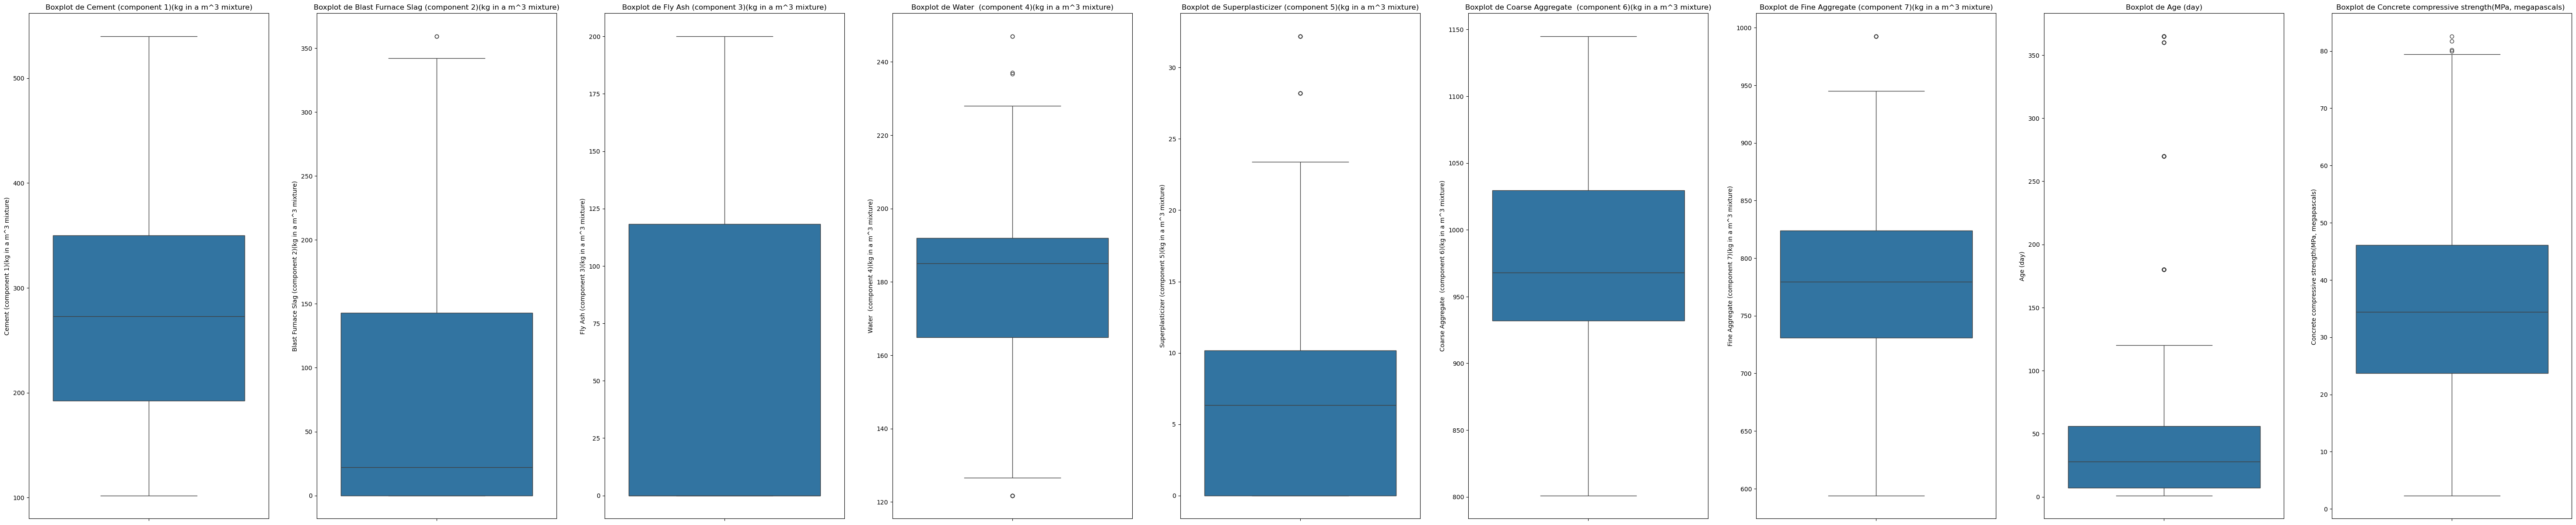

In [46]:
colonne = data.columns.tolist()
fig, axes = plt.subplots(1, 9, figsize=(75, 15), sharey=False, sharex=False)
for i, col in enumerate(colonne): 
    sns.boxplot(y=col, data=data, ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

In [47]:
marice_corelation = data.corr()
marice_corelation

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age (day),0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [50]:
y = data['Concrete compressive strength(MPa, megapascals) ']
X = data.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

In [54]:
X_train , X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [56]:
pipline = make_pipeline(RobustScaler(), SGDRegressor())
pipline

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('sgdregressor', SGDRegressor())])

In [58]:
pipline.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('sgdregressor', SGDRegressor())])

In [60]:
print(f"Le score du modele est de {pipline.score(X_test, y_test) * 100:.2f}")

Le score du modele est de 57.85
